# Rarefaction of Faith's phylogenetic diversity

Author: Monica R. Ticlla Ccenhua <br>
e-mail: mticlla@gmail.com, monicaroxana.ticllaccenhua@unibas.ch

**Summary**

To quantify diversity within each sputum sample (alpha diversity), we used the 16S-AS taxonomic profiles to compute Faith's phylogenetic diversity (PD) metric <cite data-cite="2542765/KP2NQ96N"></cite>, as implemented in QIIME2 <cite data-cite="2542765/PURSPNBC"></cite>; we preferred the PD metric because it considers phylogenetic differences between taxa which makes PD more robust to sequencing errors that could inflate the number of taxa in a sample. To minimize the effect of differences in sequencing depth, we computed rarefaction curves to set a threshold for even sampling (i.e equal number of sequences) across all samples when computing the PD metric. 

**References**
<div class="cite2c-biblio"></div>

In [1]:
report_date = %env REPORT_DATE
print(report_date)

2020-07-16


## 0. Set-up working environment

**Set-up working directory**

In [2]:
%%capture
cd ../

**Import python modules**

In [3]:
%load_ext rpy2.ipython

.Rprofile: Setting Swiss repository



In [4]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Import files

### 1.1 16S-A sequencing summaries

In [5]:
%%R
asv16s_stats_file <- "./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/denoised/denoising-stats_run123.tsv"
asv16s_stats <- read.csv(asv16s_stats_file, sep="\t", header=TRUE, row.names=1)
print(head(asv16s_stats))
cat("\nNr of samples: ")
cat(dim(asv16s_stats)[1])

       input filtered denoised non.chimeric perc_kept
A00030 69471    35777    33346        23903  34.40716
A00034 46103    25102    24765        19104  41.43765
A00036 59728    34850    34422        26914  45.06094
A00038 53641    29543    28367        17434  32.50126
A00053   440      121       49           49  11.13636
A00056 35483    18274    17893        15719  44.30009

Nr of samples: 335

## 2. Compute and plot rarefaction curves for phylogenetic diversity to select rarefaction depth

In [6]:
%%bash
mkdir -p ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction
time \
singularity exec --app QIIME2 ./containers/meta16S.sif \
    qiime diversity alpha-rarefaction \
        --i-table ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/decontam/decontam_table.qza \
        --i-phylogeny ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/tree/tree.qza \
        --p-max-depth 29000 \
        --p-metrics faith_pd \
        --o-visualization ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/alpha-rarefaction.qsv
ls ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction

Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/alpha-rarefaction.qsv.qzv
alpha-rarefaction.qsv.qzv
faith-pd_12k_rarefied
faith-pd_12k_rarefied.qzv



real	7m53.184s
user	7m18.556s
sys	0m29.951s


Lets plot the rarefaction curves for Faith's phylogenetic diversity:

In [7]:
def load_csv_within_qsv(qzv_file,csv_file):
    try:
        with ZipFile(qzv_file) as myzip:
            list_of_file_names = myzip.namelist()
            for file_name in list_of_file_names:
                if file_name.endswith(csv_file):
                    with myzip.open(file_name) as my_file:
                        csv_table = pd.read_csv(my_file, sep=',', comment='#', header=0)
                    break
    except (OSError, EOFError, BufferError) as e:
        print(e)
    finally:
        return(csv_table)
    
alpha_rarefaction_file = './data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/alpha-rarefaction.qsv.qzv'
alpha_rarefaction = load_csv_within_qsv(alpha_rarefaction_file,'faith_pd.csv')
alpha_rarefaction.set_index('sample-id',inplace=True)
alpha_rarefaction.head()

depth-1_iter-1  depth-1_iter-2  depth-1_iter-3  depth-1_iter-4  \
sample-id                                                                   
A00030           1.157762        0.942482        0.767234        1.021223   
A00034           0.620678        0.727841        0.721678        0.721678   
A00036           0.711714        0.694205        0.689263        0.730566   
A00038           0.733665        0.730566        0.733665        0.890635   
A00053           0.727841        1.015810        0.727841        0.727841   

           depth-1_iter-5  depth-1_iter-6  depth-1_iter-7  depth-1_iter-8  \
sample-id                                                                   
A00030           0.815269        0.673466        1.020816        0.689263   
A00034           0.721678        0.740092        0.730203        0.727841   
A00036           1.015810        1.015810        0.709127        0.689263   
A00038           0.737130        0.890635        0.725095        0.725095   
A00053           1.015810        0.727841        0.727841        0.727841   

           depth-1_iter-9  depth-1_iter-10  ...  depth-29000_iter-1  \
sample-id                                   ...                       
A00030           0.720891         1.016632  ...                 NaN   
A00034           0.727841         0.730203  ...                 NaN   
A00036           0.582557         0.730566  ...                 NaN   
A00038           0.890635         0.885159  ...                 NaN   
A00053           0.727841         0.727841  ...                 NaN   

           depth-29000_iter-2  depth-29000_iter-3  depth-29000_iter-4  \
sample-id                                                               
A00030                    NaN                 NaN                 NaN   
A00034                    NaN                 NaN                 NaN   
A00036                    NaN                 NaN                 NaN   
A00038                    NaN                 NaN                 NaN   
A00053                    NaN                 NaN                 NaN   

           depth-29000_iter-5  depth-29000_iter-6  depth-29000_iter-7  \
sample-id                                                               
A00030                    NaN                 NaN                 NaN   
A00034                    NaN                 NaN                 NaN   
A00036                    NaN                 NaN                 NaN   
A00038                    NaN                 NaN                 NaN   
A00053                    NaN                 NaN                 NaN   

           depth-29000_iter-8  depth-29000_iter-9  depth-29000_iter-10  
sample-id                                                               
A00030                    NaN                 NaN                  NaN  
A00034                    NaN                 NaN                  NaN  
A00036                    NaN                 NaN                  NaN  
A00038                    NaN                 NaN                  NaN  
A00053                    NaN                 NaN                  NaN  

[5 rows x 100 columns]

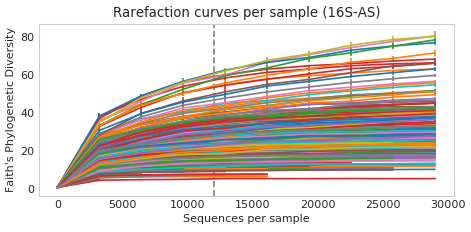

In [8]:
n_iter = 10
column_names = alpha_rarefaction.columns.values
sequences_per_sample = list({int(c_name.split('_')[0].split('-')[1]) for c_name in column_names})
sequences_per_sample.sort()

with plt.style.context('seaborn-whitegrid'):
    my_dpi=80
    fig = plt.figure(figsize=(6, 3), dpi=my_dpi, facecolor='w', edgecolor='k')
    plt.axvline(x=12000,ymax=alpha_rarefaction.max().max(), linestyle='--',color='grey')
    for sample_id in alpha_rarefaction.index.values:
        mean_per_seq_depth = alpha_rarefaction.loc[sample_id,].values.reshape(10,len(sequences_per_sample)).transpose().mean(0)
        sd_per_seq_depth = alpha_rarefaction.loc[sample_id,].values.reshape(10,len(sequences_per_sample)).transpose().std(0)
        plt.errorbar(sequences_per_sample, mean_per_seq_depth, yerr=sd_per_seq_depth)

    plt.xlabel('Sequences per sample')
    plt.ylabel("Faith's Phylogenetic Diversity")
    plt.title("Rarefaction curves per sample (16S-AS)")
    plt.grid(visible=False)
    plt.tight_layout()
    plt.savefig('reports/figures/16S_Faith-rarefaction-curves.svg', dpi=my_dpi)
plt.show()

Lets check how many samples are kept if we set sequencing depth to 12000 reads:

In [9]:
%%R
cat("Nr. of samples with at least 12000 reads:")
cat(sum(asv16s_stats$non.chimeric >= 12000))

cat("\nPercentage of samples with at least 12000 reads:")
cat(100*sum(asv16s_stats$non.chimeric >= 12000)/(nrow(asv16s_stats)))

Nr. of samples with at least 12000 reads:307
Percentage of samples with at least 12000 reads:91.64179

We select then a sequencing depth of 12000.

## 3. Compute Faith's phylogenetic diversity

In [10]:
%%bash

time \
singularity exec --app QIIME2 ./containers/meta16S.sif \
    qiime diversity alpha-rarefaction \
    --i-table ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/decontam/decontam_table.qza \
    --i-phylogeny ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/tree/tree.qza \
    --p-min-depth 12000 \
    --p-max-depth 12002 \
    --p-metrics faith_pd \
    --p-steps 2 \
    --p-iterations 1 \
    --o-visualization ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied.qzv
    
singularity exec --app QIIME2 ./containers/meta16S.sif \
    qiime tools export \
        --input-path ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied.qzv \
        --output-path ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied
        

Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied.qzv
Exported ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied.qzv as Visualization to directory ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied



real	0m25.813s
user	0m22.124s
sys	0m4.086s


In [11]:
!ls ./data/interim/QIIME2/tz_spt_cases_fwd/visualizations/rarefaction/faith-pd_12k_rarefied/

dist  faith_pd.csv  faith_pd.jsonp  index.html	q2templateassets


Lets create a FeatureTable rarefied to a sampling depth of 12000 reads:

In [12]:
%%bash
mkdir -p ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction
time \
singularity exec --app QIIME2 ./containers/meta16S.sif \
    qiime feature-table rarefy \
    --i-table ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/decontam/decontam_table.qza \
    --p-sampling-depth 12000 \
    --o-rarefied-table ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k.qza
ls ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction

Saved FeatureTable[Frequency] to: ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k.qza
feature_table_depth12k_biom
feature_table_depth12k.qza
feature_table_depth12k.tsv



real	0m6.321s
user	0m4.060s
sys	0m3.105s


Lets transform the decontaminated FeatureTable to biom and tsv tables:

In [13]:
%%bash
singularity exec --app QIIME2 ./containers/meta16S.sif \
    qiime tools export \
        --input-path ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k.qza \
        --output-path ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k_biom

biom convert \
-i ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k_biom/feature-table.biom \
-o ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k.tsv \
--table-type="OTU table" --to-tsv

ls -lh ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/

Exported ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k.qza as BIOMV210DirFmt to directory ./data/interim/QIIME2/tz_spt_cases_fwd/artifacts/rarefaction/feature_table_depth12k_biom
total 23M
drwxr-xr-x 2 ticlla gagneux  512 16. Jul 11:07 feature_table_depth12k_biom
-rw-r--r-- 1 ticlla gagneux 898K 16. Jul 11:07 feature_table_depth12k.qza
-rw-r--r-- 1 ticlla gagneux  26M 16. Jul 11:07 feature_table_depth12k.tsv
